In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
y[y!=0] = 1

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_predict = log_reg.predict(x_test)
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [7]:
decision_scores = log_reg.decision_function(x_test)
decision_scores

array([ 4.52818505,  6.87901472,  1.76728414,  6.52488998, -3.69893489,
        3.62555304,  4.5641345 ,  6.91106486,  5.03499692,  4.3292245 ,
        4.65382011, -3.43985382, -3.38750347, -3.39712028,  9.14590416,
        3.55830077, -5.19913952,  8.64478135,  7.05911342,  7.24100241,
        5.13254176, -3.758013  , 11.76868021, -3.89433573,  4.27903572,
        4.01351394, -4.2488403 ,  3.78927124,  8.75367646,  9.69578918,
       -4.01142913, -3.69538324,  3.69140718,  7.14170805,  1.08284202,
        5.36638089,  7.40154878, 10.56568001])

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_scores = []
recall_scores = []
thresholds = np.sort(decision_scores)

for threshold in thresholds:
    y_predict = np.array(decision_scores>=threshold, dtype= 'int')
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision_scores.append(precision)
    recall_scores.append(recall)

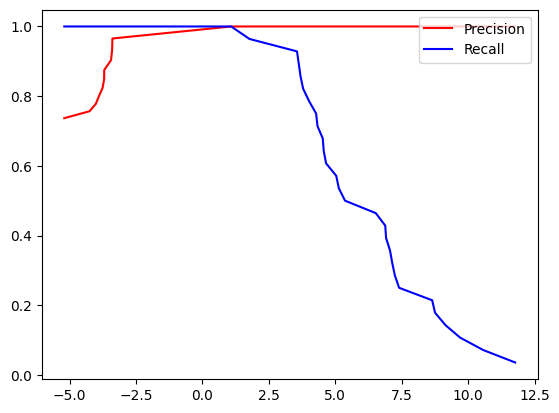

In [9]:
plt.plot(thresholds, precision_scores, color='r', label='Precision')
plt.plot(thresholds, recall_scores, color='b', label='Recall')
plt.legend(loc='upper right')

### PR曲线

Text(0, 0.5, 'precision')

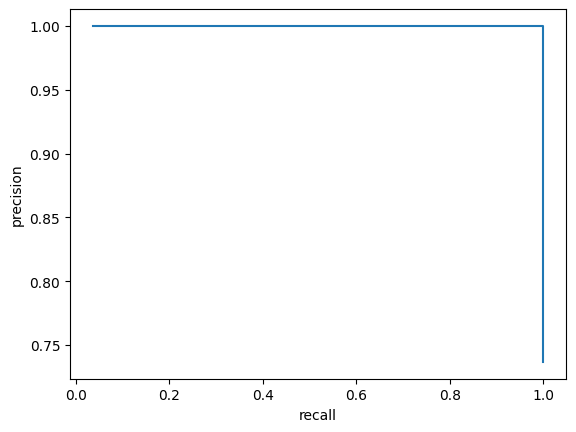

In [10]:
plt.plot(recall_scores, precision_scores)
plt.xlabel('recall')
plt.ylabel('precision')

In [11]:
from sklearn.metrics import precision_recall_curve
precision_scores, recall_scores, thresholds = precision_recall_curve(y_test, decision_scores)

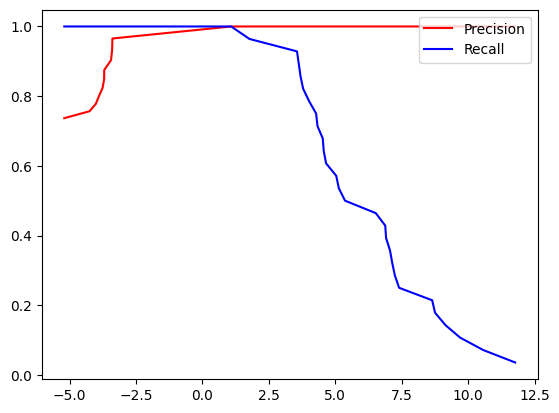

In [12]:
plt.plot(thresholds, precision_scores[:-1], color='r', label='Precision')    # 最后会多出一个1
plt.plot(thresholds, recall_scores[:-1], color='b', label='Recall')    # 最后会多出一个0
plt.legend(loc='upper right')

Text(0, 0.5, 'precision')

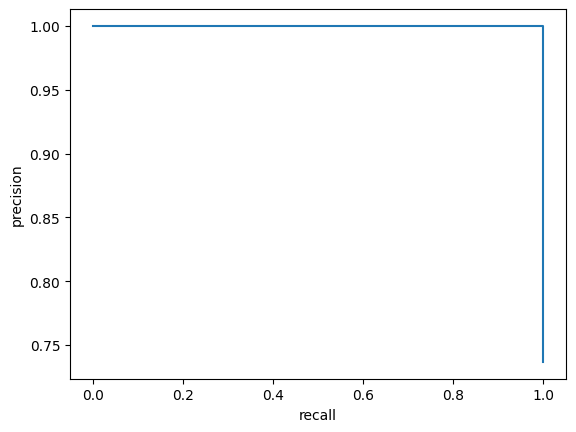

In [13]:
plt.plot(recall_scores, precision_scores)
plt.xlabel('recall')
plt.ylabel('precision')

理论上应该是一个递减的弧线

### ROC曲线 Reciever Operation Characteristic Curve

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

Text(0, 0.5, 'TPR')

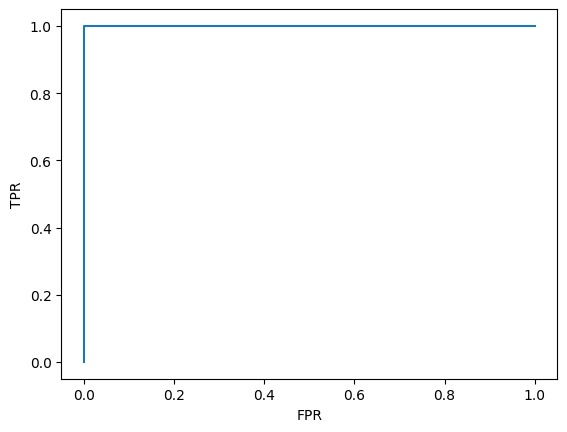

In [15]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

### AUC
area under curve

In [16]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,decision_scores)
auc

1.0

PR曲线用于正常人大而患证人数小的情况<br>
AUC无论在哪种情况下都变化不大